In [87]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import qutip as quit
from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve)
from qutip.measurement import measure_observable, measurement_statistics
from qutip.expect import expect
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
#Add util to the path
import sys
sys.path.append('../util')
sys.path.append('../')

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
#import savgol:
from scipy.signal import savgol_filter
from fitting_functions_ZNE import third_no_first_ZNE, order_poly_ZNE, order_poly_instance, converge_ZNE_order, converge_ZNE_loocv

from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve, sesolve, mesolve)
from basic_TFIM_funcs import get_s_lists
from joblib import Parallel, delayed
from functions_util import cetina_thermal_exp, cetina_envelope_exp,calibrate_sim_Omegas
from samplers_util import thermal_rejection

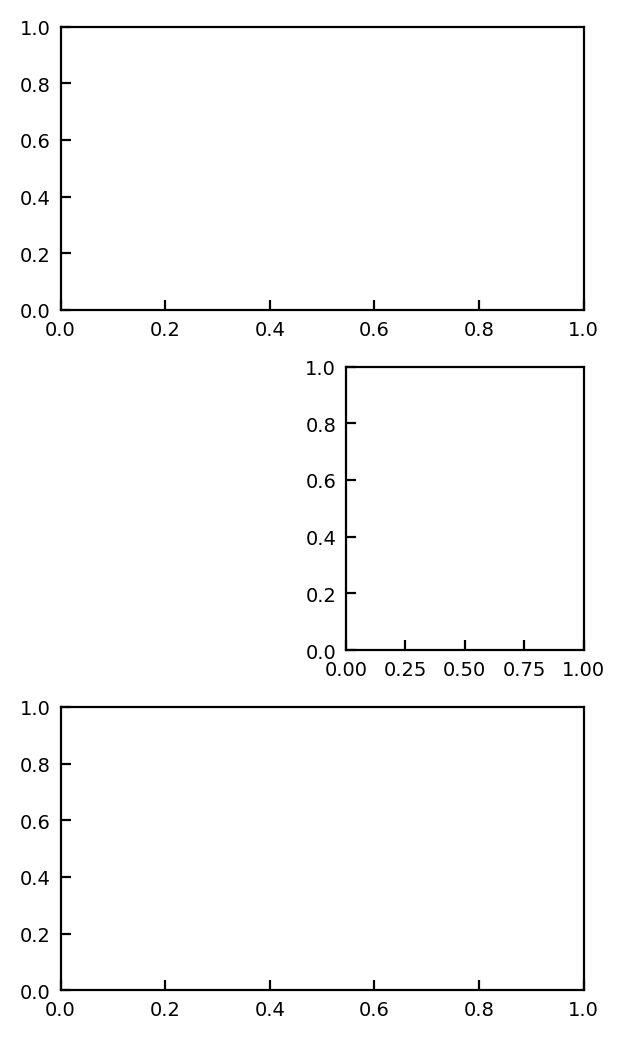

In [88]:
import matplotlib as mpl

columns = 1
rows = 3
scol=(3+3/8) #single column width of PRL,
dcol=2*scol # double column,
size_col = scol*columns#[scol, dcol][columns-1]
size_row = scol*rows#scol, dcol][rows-1]

fullwidth=6.3,
from matplotlib import cm
gr=(np.sqrt(5.0) - 1.0) / 2.0 #golden ratio,
cm_subsection = np.linspace(0.2, 1.0, 5)
Reds = [ cm.Reds(x) for x in cm_subsection ]
mpl.rcParams.update({
    "ytick.direction": "in",
    "xtick.direction": "in",
    "axes.labelpad": 0,
    "font.size": 7,
    "legend.frameon": False,
    "figure.dpi":200,
    "figure.figsize": [size_col, size_row * gr],
    #"axes.prop_cycle": cycler('color', palettable.colorbrewer.qualitative.Dark2_8.mpl_colors)
    # "axes.prop_cycle": cycler('color', palettable.colorbrewer.sequential.Reds_9.mpl_colors[1:])
})
fig = plt.figure()
gs = gridspec.GridSpec(3,2)  # 2x2 grid
ax_a = fig.add_subplot(gs[:2])
ax_b = fig.add_subplot(gs[4:6])
#ax_ci = fig.add_subplot(gs[2])
ax_ci = fig.add_subplot(gs[3])



In [89]:
""" Oscillations without frequency corrections. Imports data from experiments, then performs processing and plotting. """
#Data sets from "Round 2 Verification" and "Round 2 Initial"
#np.savez('data_dump', times = t_w_data['x']*us, thetas = thetas, qubits = qubit_index, Omegas = Omegas, data=t_w_data['probs'])

#cmap = LinearSegmentedColormap.from_list("mycmap", ["blue", "red"])
cmap = cm.get_cmap('Reds')
#Crop the lowest points from cmap, start at 0.5:




## START NOT AT 0:



initial_file = np.load("../data/ROUND_2_INITIAL/data_dump.npz")

plotting_version = 1

times = initial_file['times']
thetas = initial_file['thetas']
qubits = initial_file['qubits']
Omegas = initial_file['Omegas']
print(Omegas[0])
data = initial_file['data']
std_matrix = initial_file['std_matrix']
print(data.shape)
print(data.shape)
qubit_to_use = 2
qubit_index_full = qubits[qubit_to_use]
data_qubit = data[:,qubit_index_full,:]
stds_qubit = std_matrix[:,qubit_index_full,:]
print(data_qubit.shape)
theta_qubit = thetas[:,qubit_to_use]
print(theta_qubit)
Omega_qubit = Omegas[:,qubit_to_use]
print(thetas)
for index in range(len(thetas)):
    ax_a.plot(times, data_qubit[index], color=cmap(index/len(thetas)/2+0.5), label=theta_qubit[index], linewidth=1)#, yerr=stds_qubit[index])#, alpha=max(0.2,(1/(index+1))))
    ax_a.fill_between(times, data_qubit[index] - stds_qubit[index], data_qubit[index] + stds_qubit[index], color=cmap(index/len(thetas)/2+0.5), alpha=0.15)
ax_a.plot(times, (0.5 - np.cos(Omega_qubit[0]*times)/2), color='black', zorder=100, ls='--', lw=0.8)
#ax_a.legend()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(thetas[qubit_to_use])))
sm.set_array([])
#Add a label to the color bar:

cbar_a = fig.colorbar(sm, ax=ax_a)

cbar_a.set_label(r'$\theta$')
# s
##NEED STANDARD DEVIATION
#THE INDEXES ARE NOT IN ORDER???

[1027200.14392676 1032506.91489062  980172.70253338  937809.30321544]
(9, 23, 26)
(9, 23, 26)
(9, 26)
[0.057793   0.06574115 0.07655879 0.15612184 0.15612184 0.10509314
 0.11692185 0.18123138 0.2261819 ]
[[0.05988027 0.06032327 0.057793   0.067054  ]
 [0.07168436 0.08152999 0.06574115 0.05348242]
 [0.09265049 0.0864947  0.07655879 0.0674449 ]
 [0.18215574 0.17444399 0.15612184 0.15684063]
 [0.18215582 0.17444399 0.15612184 0.15684063]
 [0.12346706 0.13250608 0.10509314 0.09614671]
 [0.12919904 0.13173142 0.11692185 0.11562191]
 [0.19629255 0.2001033  0.18123138 0.17775948]
 [0.2562873  0.26078725 0.2261819  0.23842394]]


/var/folders/vf/9t237r796tb0tg2rrtljdd940000gn/T/ipykernel_80900/1613258746.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


/Users/thomassteckmann/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/Users/thomassteckmann/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(9, 26)
0.0016666666666666668 + 0.0·x¹ + 0.0·x² + 0.0·x³
0.11031987502169129 + 0.0·x¹ - 3.7975236429434114·x² +
15.251022103635613·x³
0.3624908929139515 + 0.0·x¹ - 5.436209927048448·x² + 18.714898423709574·x³
0.6489232259651019 + 0.0·x¹ - 2.7799688091065295·x² + 5.790951148642857·x³
0.9258610950686762 + 0.0·x¹ - 10.458354849017997·x² +
37.297306761194385·x³
0.9966145516466168 + 0.0·x¹ - 2.850127334178073·x² + 1.3997228337236822·x³
0.8660959806269303 + 0.0·x¹ + 5.852894255328367·x² - 27.780701049392167·x³
0.6433406117380479 + 0.0·x¹ + 6.557132690702376·x² - 22.725119205727147·x³
0.2959664725816116 + 0.0·x¹ + 16.49955651404896·x² - 54.18105561338455·x³
0.0722265381686107 + 0.0·x¹ + 14.39115120691647·x² - 42.73674532187512·x³
0.006449994705910382 + 0.0·x¹ + 9.645328608955012·x² -
20.31583328790005·x³
0.13140851499637188 + 0.0·x¹ - 0.11831030998461217·x² +
12.469761960600849·x³
0.39058918227984674 + 0.0·x¹ - 12.174428142332452·x² +
57.53774822509891·x³
0.7116189591342871 + 0.0·x¹ - 20.7048

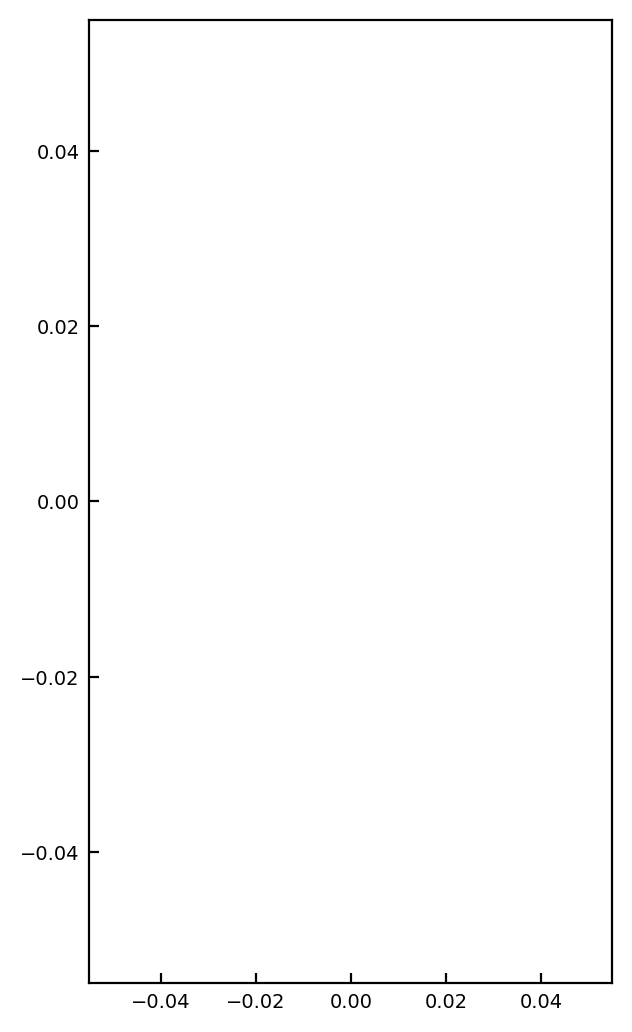

0.9813445921220441 + 0.0·x¹ - 21.64992253818091·x² + 72.78328287901266·x³


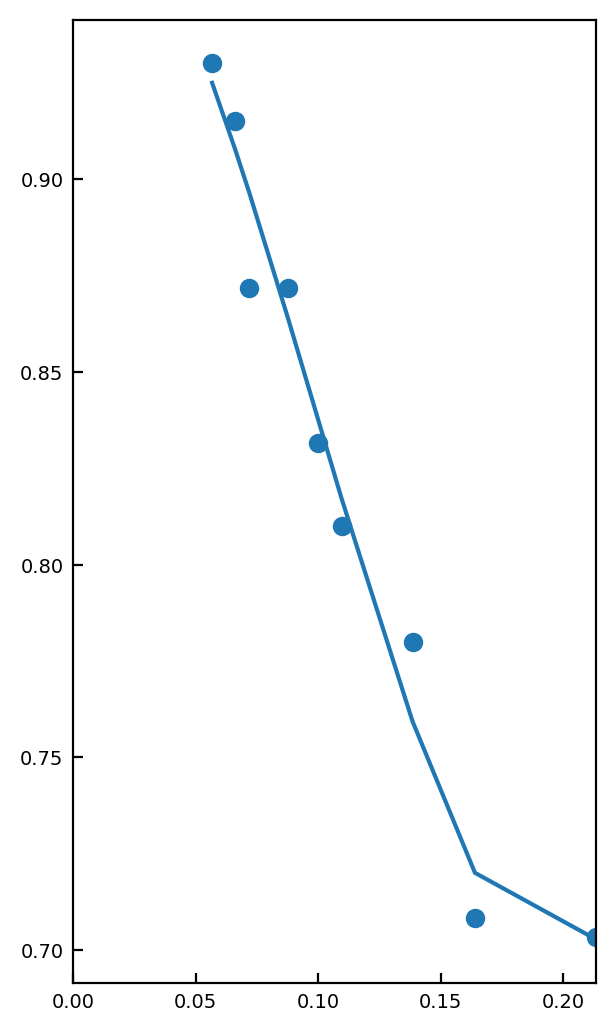

[1002721.84748828  999756.13891392  993974.78477393  993267.10187799
  991332.84115504  980988.87867054  972768.5590532   976777.50462576
  986628.20941986]


In [90]:
""" Oscillations without frequency corrections. Imports data from experiments, then performs processing and plotting. """
#Data sets from "Round 2 Verification" and "Round 2 Initial"
#np.savez('data_dump', times = t_w_data['x']*us, thetas = thetas, qubits = qubit_index, Omegas = Omegas, data=t_w_data['probs'])

#cmap = LinearSegmentedColormap.from_list("mycmap", ["blue", "red"])

initial_file = np.load("../data/ROUND_2_VERIFICATION/data_dump.npz")

plotting_version = 1

times = initial_file['times']
thetas = initial_file['thetas']
qubits = initial_file['qubits']
Omegas = initial_file['Omegas']
data = initial_file['data']
std_matrix = initial_file['std_matrix']
#print(data.shape)
#print(data.shape)
qubit_to_use = 2
qubit_index_full = qubits[qubit_to_use]
data_qubit = data[:,qubit_index_full,:]
stds_qubit = std_matrix[:,qubit_index_full,:]
#print(data_qubit.shape)
theta_qubit = thetas[:,qubit_to_use]
#print(theta_qubit)
Omega_qubit = Omegas[:,qubit_to_use]
#print(thetas)
for index in range(len(thetas)):
    ax_b.plot(times, data_qubit[index], color=cmap(index/len(thetas)/2+0.5), label=theta_qubit[index], linewidth=1)#, yerr=stds_qubit[index])#, alpha=max(0.2,(1/(index+1))))
    ax_b.fill_between(times, data_qubit[index] - stds_qubit[index], data_qubit[index] + stds_qubit[index], color=cmap(index/len(thetas)/2+0.5), alpha=0.15)
ideal_data = 0.5 - np.cos(Omega_qubit[0]*times)/2
ax_b.plot(times, (0.5 - np.cos(Omega_qubit[0]*times)/2), color='black', zorder=100, ls='--', lw=0.8)
#ax_a.legend()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(thetas[qubit_to_use])))
sm.set_array([])
#Add a label to the color bar:

#Performing ZNE:


#ZNE_function = order_poly_instance(5, debug=True)
ZNE_function = lambda x, y, weights: converge_ZNE_loocv(x, y, debug=False, weights=weights)



ZNE_data = np.zeros(len(times))
ZNE_functions = []
print(data_qubit.shape)
for index in range(len(times)):
    #print(data_qubit[:,index])
    fitted_function = ZNE_function(theta_qubit,data_qubit[:,index], weights=stds_qubit[:,index])
    print(fitted_function)
    ZNE_data[index] = fitted_function(0)
    ZNE_functions.append(fitted_function)

    


ax_b.plot(times, ZNE_data, color='blue')
#Draw the vertical slice: 


index_of_slice = 15


print(data_qubit[:,index_of_slice])
ax_b.axvline(x=times[index_of_slice], color='black', ls=':')
print(ZNE_data.shape)
for theta_index in range(len(theta_qubit)):
    ax_ci.errorbar(theta_qubit[theta_index], data_qubit[theta_index, index_of_slice], color=cmap(theta_index/len(thetas)), yerr=stds_qubit[theta_index, index_of_slice], linewidth=1)
    ax_ci.scatter(theta_qubit[theta_index], data_qubit[theta_index, index_of_slice], color=cmap(theta_index/len(thetas)), s=10)
    
dense_theta = np.linspace(0, max(theta_qubit), 1000)
ax_ci.plot(dense_theta, ZNE_functions[index_of_slice](dense_theta), color='blue', label='ZNE Fit')
ax_ci.set_xlim(0, max(theta_qubit)+0.01)


ZNE_function = lambda x, y, weights: converge_ZNE_loocv(x, y, debug=True, weights=weights)
ZNE_function(theta_qubit,data_qubit[:,index_of_slice], weights=stds_qubit[:,index_of_slice])

"""Generate Simulation Data using Cetina Function and SPAM?"""
theta_axis_data = np.zeros((len(dense_theta), len(times)))
Omega_ideal = Omegas[0, qubit_to_use]
print(Omega_qubit)
Omega_scaled = np.abs(calibrate_sim_Omegas(dense_theta, Omega_ideal, times))*Omega_ideal
#ax_b.plot(times, cetina_thermal_exp(times, 0, Omega_scaled[0]))
#NEED TO CORRECT THIS FREQUENCY
for theta_index in range(len(dense_theta)):
    theta = dense_theta[theta_index]
    theta_axis_data[theta_index] = cetina_thermal_exp(times, theta, Omega_scaled[theta_index])

ax_ci.plot(dense_theta, theta_axis_data[:,index_of_slice], color='black', linestyle='--', label='Numerical')
ax_ci.scatter(0, ideal_data[index_of_slice], color='black', s=10)

#Error plot: Take the largest error up to the time and plot on a log plot
baseline_error = np.abs(data_qubit[0] - ideal_data)
ZNE_error = np.abs(ZNE_data - ideal_data)

rolling_max_basline_error = np.maximum.accumulate(baseline_error)
rolling_max_ZNE_error = np.maximum.accumulate(ZNE_error)

ax_cii.plot(times, rolling_max_basline_error, label=r'$\theta$ = {:.2f}'.format(theta_qubit[0]), color='black')
ax_cii.plot(times, rolling_max_ZNE_error, label='ZNE', color='blue')
ax_cii.set_ylabel('Absolute error')
#ax_cii.set_yscale('log')
ax_cii.hlines(stds_qubit[0,index_of_slice], times[0], times[-1], color='red', ls='--', label='Shot Noise')
ax_cii.legend()


cbar_b = fig.colorbar(sm, ax=ax_b)
cbar_b.set_label(r'$\theta$')

# s
##NEED STANDARD DEVIATION
#THE INDEXES ARE NOT IN ORDER???

In [91]:
print(stds_qubit.shape)
print(stds_qubit[0,index_of_slice])

(9, 26)
0.010425024471212263


In [92]:
ax_a.set_title('Rabi Oscillations -- Pre Calibration')
ax_a.set_ylabel('Population Transfer')
ax_a.set_xlabel('Time (us)')
ax_a.set_xticks(np.array([0, .5, 1, 1.5])*1E-5)
ax_a.set_xticklabels([0, 5, 10, 15])


cbar_b.set_label(r"$\theta$", labelpad=-21, y=1.08, rotation=0)
cbar_a.set_label(r"$\theta$", labelpad=-21, y=1.08, rotation=0)

#ax_a.set_xticklabels([{:.2f}.format(x) for index in range(len(times, 5))])

ax_ci.set_xlabel(r'Temperature, $\theta$')
ax_ci.set_ylabel('Population Transfer')
ax_ci.legend()
ax_b.set_title('Rabi Oscillations -- Calibrated')
ax_b.set_ylabel('Population Transfer')
ax_b.set_xlabel('Time (us)')
ax_b.set_xticks(np.array([0, .5, 1, 1.5])*1E-5)
ax_b.set_xticklabels([0, 5, 10, 15])


fig.tight_layout()
fig.savefig("Figure_3.pdf", bbox_inches='tight')
fig.savefig("Figure_3.png", bbox_inches='tight', dpi=600)